In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [8]:
# inicializamos la semilla para generar numeros aleatorios
seed=np.random.seed(0)


# cargamos el dataset
url= "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
ds=read_csv(url)

RF:0.950000(0.040825)
KNN:0.958333(0.041667)
NB:0.950000(0.055277)
SVM:0.983333(0.033333)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP:0.958333(0.055902)


C:\Users\ferna\AppData\Local\Temp\ipykernel_25160\3770142819.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


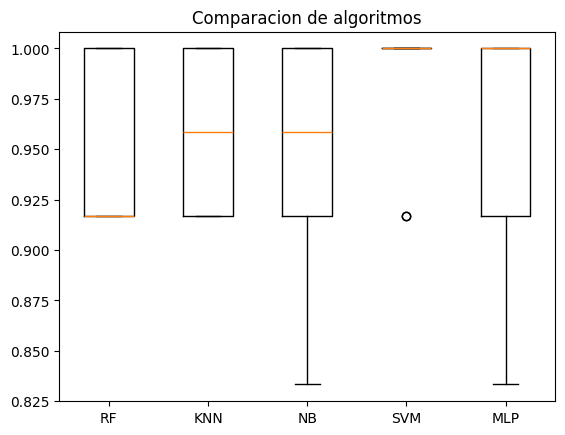

In [18]:
# Dividimos el dataset en 80% de los datos para entrenar y 20% para testear
array = ds.values
x= array[:,0:4]
y= array[:,4]

x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2,random_state=1, shuffle=True)

# cargamos algoritmos
models=[]

models.append(("RF", RandomForestClassifier(n_jobs=2,random_state=seed)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))
models.append(("MLP", MLPClassifier(activation="relu", alpha=1e-05, batch_size="auto", beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(3,3), learning_rate="constant", learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, solver="lbfgs", tol=0.0001, validation_fraction=0.1, verbose=False,warm_start=False)))

# evaluamos cada modelo por turnos
results= []
names = []

for name, model in models:
    kfold= StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results= cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)' % (name, cv_results.mean(),cv_results.std()))

# comprobacion de algoritmos
pyplot.boxplot(results, labels=names)
pyplot.title('Comparacion de algoritmos')
pyplot.show()